In [1]:
import praw
import pandas as pd
import datetime as dt

In [2]:
reddit = praw.Reddit(client_id='LbdtH3WioyCU3l15j_EpIg', \
                     client_secret='zZMUPKsHBXIMuVsoV0uoYGWYo74wkA', \
                     user_agent='Anxiety_prediction')

In [3]:
predictions = set()
for submission in reddit.subreddit('anxiety').hot(limit=200):
    print(submission.title)
    predictions.add(submission.title)
print(len(predictions))   

Set your intention
Monthly Check-In Thread
I need a hug 😢
I posted a while ago that I was afraid of getting the vaccine.
I’m leaving Reddit to try to feel better
I made a phone call!
Anxiety Sunday nights
If caffeine fuels anxiety, then what to do instead of it?
okay pls help :(
Does your Anxiety fluctuate at times and you don’t know what the trigger is?
It’s insane how much you can over analyze complete silence from someone
Zoloft
Has anyone else have this happen to them regarding there studies.
mentally exhausted
Anyone ever freeze before they have to go somewhere?
Extreme mood changes
I start a new job tomorrow after not working for over 3 years.
Does anyone else experience severe panic every time they start to fall asleep?
I hate when people tell me what I’m going through is normal
Nausea/Anxiety when leaving house
Is it just me who just feels weird in certain settings
Idk how much longer I can do this
Going for my first job interview ever tomorrow and looking for advice
Out of loc

In [4]:
df = pd.DataFrame(predictions)
df.head()

,0
0,Sleep paralysis: PLEASE tell me your personal ...
1,Out of lockdown
2,Does anyone else get super anxious being aroun...
3,Sleep anxiety ?
4,Tips on how not always to assume the worst?


In [5]:
df.to_csv('predictions.csv',header=False, encoding ='utf-8', index=False)

In [6]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in predictions:
    pol_score = sia.polarity_scores(line) # -> dict
    pol_score['title'] = line
    results.append(pol_score)

In [8]:
df=pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,title
0,0.000,0.558,0.442,0.7456,Sleep paralysis: PLEASE tell me your personal ...
1,0.000,1.000,0.000,0.0000,Out of lockdown
2,0.121,0.485,0.394,0.6705,Does anyone else get super anxious being aroun...
3,0.630,0.370,0.000,-0.1779,Sleep anxiety ?
4,0.339,0.661,0.000,-0.6249,Tips on how not always to assume the worst?


In [9]:
# 0 is for not anxious
# 1 is for anxious

In [10]:
df['label'] = None
df.loc[df['compound']>0.2, 'label'] = 0
df.loc[df['compound']<-0.2, 'label'] = 1 
df.head()

,neg,neu,pos,compound,title,label
0,0.000,0.558,0.442,0.7456,Sleep paralysis: PLEASE tell me your personal ...,0
1,0.000,1.000,0.000,0.0000,Out of lockdown,None
2,0.121,0.485,0.394,0.6705,Does anyone else get super anxious being aroun...,0
3,0.630,0.370,0.000,-0.1779,Sleep anxiety ?,None
4,0.339,0.661,0.000,-0.6249,Tips on how not always to assume the worst?,1


In [11]:
df.label.value_counts()

1    76
0    31
Name: label, dtype: int64

In [12]:
df.label.value_counts(normalize=True)*100

1    71.028037
0    28.971963
Name: label, dtype: float64

In [13]:
print("Not anxious:\n")
print(list(df[df['label'] == 0].label)[:5]) 

print("\Anxious:\n")
print(list(df[df['label'] == 1].label)[:5] ) 

Not anxious:

[0, 0, 0, 0, 0]
\Anxious:

[1, 1, 1, 1, 1]


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

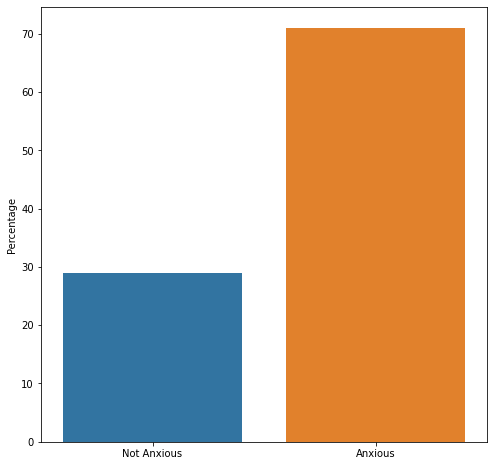

In [15]:
fig, ax = plt.subplots(figsize=(8,8))

counts = df.label.value_counts(normalize=True)*100

sns.barplot(x=counts.index , y=counts, ax=ax)

ax.set_xticklabels(['Not Anxious','Anxious'])
ax.set_ylabel("Percentage")
plt.show()